# Aprendizaje Automático en Grafos

### - LECTURA DE FICHEROS

In [1]:
import pandas
import numpy
#Usamos el método read_csv para leer  ENGB_target.csv, y para ello necesitamos pandas.
twitch_users = pandas.read_csv('ENGB_target.csv', skiprows=1 , header=None,
                       names=['id2', 'days', 'mature', 'views',
                              'partner', 'id'], 
                        usecols = ['id', 'days', 'mature', 'views',
                              'partner'] )


In [2]:
cols = ['id',  'partner','days', 'views','mature']
twitch_users [['mature']] *= 1 #codificamos la columna de partner a 0=False y 1=True
twitch_users=twitch_users[cols]

In [3]:
twitch_users.head(20)


,id,partner,days,views,mature
0,2299,False,1459,9528,0
1,153,False,1629,3615,1
2,397,False,411,46546,1
3,5623,False,953,5863,1
4,5875,False,741,5594,1
5,3346,False,1820,4594,0
6,6930,False,2070,18460,0
7,6367,False,846,204,1
8,1434,False,936,1064,1
9,4470,False,973,313084,0


### - CREACIÓN DEL GRAFO

In [4]:
#usando la librería networkx (como nx) creamos un grafo vacío
import networkx as nx
G=nx.Graph()

In [5]:
#recorremos las aristas
aristas = pandas.read_csv('ENGB_edges.csv')

In [6]:
aristas1 = aristas[['from', 'to']]

In [7]:
G = nx.from_pandas_edgelist(aristas1, 'from', 'to')

In [8]:
print(G.number_of_edges())
G.number_of_nodes()

35324


7126

In [9]:
from matplotlib.pyplot import figure
#figure(figsize=(100, 80))
#nx.draw_spring(G, with_labels=True)
#Asi se dibuja el grafo pero es demasiado grande, por lo que no recomendamos ejecutarlo

### - MODELO DE CLASIFICACIÓN _KNN_

In [10]:
from sklearn import preprocessing

atributos = twitch_users.loc[:, 'days': 'mature']  # selección de las columnas de atributos
objetivo = twitch_users['partner']  # selección de la columna objetivo
minmax = preprocessing.MinMaxScaler() #normalizar
atr = minmax.fit_transform(atributos)
atr

array([[3.37257788e-01, 5.33499790e-05, 0.00000000e+00],
       [3.78955114e-01, 2.02240286e-05, 1.00000000e+00],
       [8.02060338e-02, 2.60733106e-04, 1.00000000e+00],
       ...,
       [3.27201374e-01, 2.14789267e-05, 1.00000000e+00],
       [4.81236203e-01, 3.47505953e-05, 1.00000000e+00],
       [4.20161884e-01, 1.98318729e-05, 0.00000000e+00]])

In [11]:
print(pandas.Series(objetivo).value_counts(normalize=True))

False    0.946113
True     0.053887
Name: partner, dtype: float64


In [12]:
from sklearn import model_selection
from sklearn import neighbors
cv_scores_KNN = {}
for k in range (1,11):                          #EXPLICAR POR QUE USAMOS HAMMING
    clasif_KNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')  
    cv_scores = model_selection.cross_val_score(clasif_KNN,
                                               atr,
                                               objetivo,
                                               cv=10)
    cv_scores_KNN[k]= cv_scores.mean()
print(cv_scores_KNN)
mejor_k_KNN = max(cv_scores_KNN, key=cv_scores_KNN.get)
print(f'\nMejor suavizado: {mejor_k_KNN}')
media_resultados=sum(cv_scores_KNN.values())/len(cv_scores_KNN.values())
print(f'\nMedia de la tasa de aciertos: {media_resultados}')


{1: 0.9104781584379975, 2: 0.9447100004727609, 3: 0.9438680917786847, 4: 0.9458324140756732, 5: 0.9301241391808626, 6: 0.9302645886190648, 7: 0.9036166222796538, 8: 0.9451313487873678, 9: 0.9451313487873678, 10: 0.9461131159682934}

Mejor suavizado: 10

Media de la tasa de aciertos: 0.9345269828387727


####  KNN Relacional


In [13]:
import networkx as nx
centrality = nx.betweenness_centrality(G)

In [14]:
clustering = nx.clustering(G)

In [15]:
degree = nx.degree(G)

In [16]:

twitch_users_relacional = twitch_users
twitch_users_relacional['degree']= twitch_users_relacional['id'].map(degree)
twitch_users_relacional['clustering']= twitch_users_relacional['id'].map(clustering)
twitch_users_relacional['bcentrality']= twitch_users_relacional['id'].map(centrality)

In [17]:
twitch_users_relacional

,id,partner,days,views,mature,degree,clustering,bcentrality
0,2299,False,1459,9528,0,7,0.142857,0.000434
1,153,False,1629,3615,1,19,0.093567,0.000828
2,397,False,411,46546,1,9,0.055556,0.000044
3,5623,False,953,5863,1,3,0.000000,0.000004
4,5875,False,741,5594,1,2,0.000000,0.000030
...,...,...,...,...,...,...,...,...
7121,3794,False,2624,3174,0,4,0.333333,0.000010
7122,6534,False,2035,3158,1,5,0.100000,0.000046
7123,2041,False,1418,3839,1,3,0.000000,0.000004
7124,6870,False,2046,6208,1,20,0.110526,0.000247


In [18]:
from sklearn import preprocessing

atributos_relacional = twitch_users.loc[:, 'days': 'bcentrality']  # selección de las columnas de atributos
objetivo_relacional = twitch_users['partner']  # selección de la columna objetivo
minmax2 = preprocessing.MinMaxScaler() #normalizar
atr2 = minmax.fit_transform(atributos_relacional)
atr2


array([[3.37257788e-01, 5.33499790e-05, 0.00000000e+00, 8.34492350e-03,
        1.42857143e-01, 3.42247268e-03],
       [3.78955114e-01, 2.02240286e-05, 1.00000000e+00, 2.50347705e-02,
        9.35672515e-02, 6.53011946e-03],
       [8.02060338e-02, 2.60733106e-04, 1.00000000e+00, 1.11265647e-02,
        5.55555556e-02, 3.45002997e-04],
       ...,
       [3.27201374e-01, 2.14789267e-05, 1.00000000e+00, 2.78164117e-03,
        0.00000000e+00, 3.42645219e-05],
       [4.81236203e-01, 3.47505953e-05, 1.00000000e+00, 2.64255911e-02,
        1.10526316e-01, 1.94802101e-03],
       [4.20161884e-01, 1.98318729e-05, 0.00000000e+00, 1.39082058e-03,
        0.00000000e+00, 1.42698255e-05]])

In [19]:
from sklearn import model_selection
from sklearn import neighbors
cv_scores_KNN = {}
for k in range (1,11):                          #EXPLICAR POR QUE USAMOS HAMMING
    clasif_KNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')  
    cv_scores = model_selection.cross_val_score(clasif_KNN,
                                               atr2,
                                               objetivo_relacional,
                                               cv=10)
    cv_scores_KNN[k]= cv_scores.mean()
print(cv_scores_KNN)
mejor_k_KNN = max(cv_scores_KNN, key=cv_scores_KNN.get)
print(f'\nMejor suavizado: {mejor_k_KNN}')
media_resultados=sum(cv_scores_KNN.values())/len(cv_scores_KNN.values())
print(f'\nMedia de la tasa de aciertos: {media_resultados}')

{1: 0.9253474793954961, 2: 0.946113509935862, 3: 0.9438684857462534, 4: 0.9447100004727611, 5: 0.9445689600832059, 6: 0.945691964637471, 7: 0.944990505381597, 8: 0.9458326110594575, 9: 0.9458326110594575, 10: 0.9461131159682934}

Mejor suavizado: 2

Media de la tasa de aciertos: 0.9433069243739854


Podemos ver que la tasa de acierto ha aumentado con el modelo relacional.

### - MODELO DE CLASIFICACIÓN _Naive Bayes_

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
enc = KBinsDiscretizer(n_bins=50,encode='onehot',strategy='uniform')

In [22]:
atributos_enc1 = enc.fit_transform(atributos)

In [23]:
from sklearn import naive_bayes
cv_scores_NB = {}
for k in range (1,11):
    clasif_NB = naive_bayes.MultinomialNB(alpha=k)  # alpha es el parámetro de suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                               atributos_enc1,
                                               objetivo,
                                               cv=10)
    cv_scores_NB[k]= cv_scores.mean()
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB, key=cv_scores_NB.get)
print(f'\nMejor suavizado: {mejor_k_NB}')
media_resultados=sum(cv_scores_NB.values())/len(cv_scores_NB.values())
print(f'\nMedia de la tasa de aciertos: {media_resultados}')

{1: 0.9521475172163825, 2: 0.9520072647619646, 3: 0.9517265628693444, 4: 0.9508848511590525, 5: 0.9497620435885719, 6: 0.949060190365129, 7: 0.9484987865798885, 8: 0.948217887703484, 9: 0.9479373827946482, 10: 0.947656680902028}

Mejor suavizado: 1

Media de la tasa de aciertos: 0.9497899167940493


#### NAIVE BAYES Relacional

In [24]:
atributos_enc2 = enc.fit_transform(atributos_relacional)

In [25]:
from sklearn import naive_bayes
cv_scores_NB = {}
for k in range (1,11):
    clasif_NB = naive_bayes.MultinomialNB(alpha=k)  # alpha es el parámetro de suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                               atributos_enc2,
                                               objetivo_relacional,
                                               cv=10)
    cv_scores_NB[k]= cv_scores.mean()
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB, key=cv_scores_NB.get)
print(f'\nMejor suavizado: {mejor_k_NB}')
media_resultados=sum(cv_scores_NB.values())/len(cv_scores_NB.values())
print(f'\nMedia de la tasa de aciertos: {media_resultados}')

{1: 0.957058913910207, 2: 0.9566381565469531, 3: 0.9559368942748634, 4: 0.9553750965220544, 5: 0.9555155459602567, 6: 0.9559366972910791, 7: 0.955515742944041, 8: 0.9550945916132185, 9: 0.9559363033235104, 10: 0.9566377625793846}

Mejor suavizado: 1

Media de la tasa de aciertos: 0.9559645704965568


En este caso la tasa de acierto sube al añadir los atributos relacionales

### - MODELO DE CLASIFICACIÓN _Árbol de Decisión_

In [26]:
from sklearn import tree
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos, objetivo)

DecisionTreeClassifier(max_depth=5, random_state=54321)

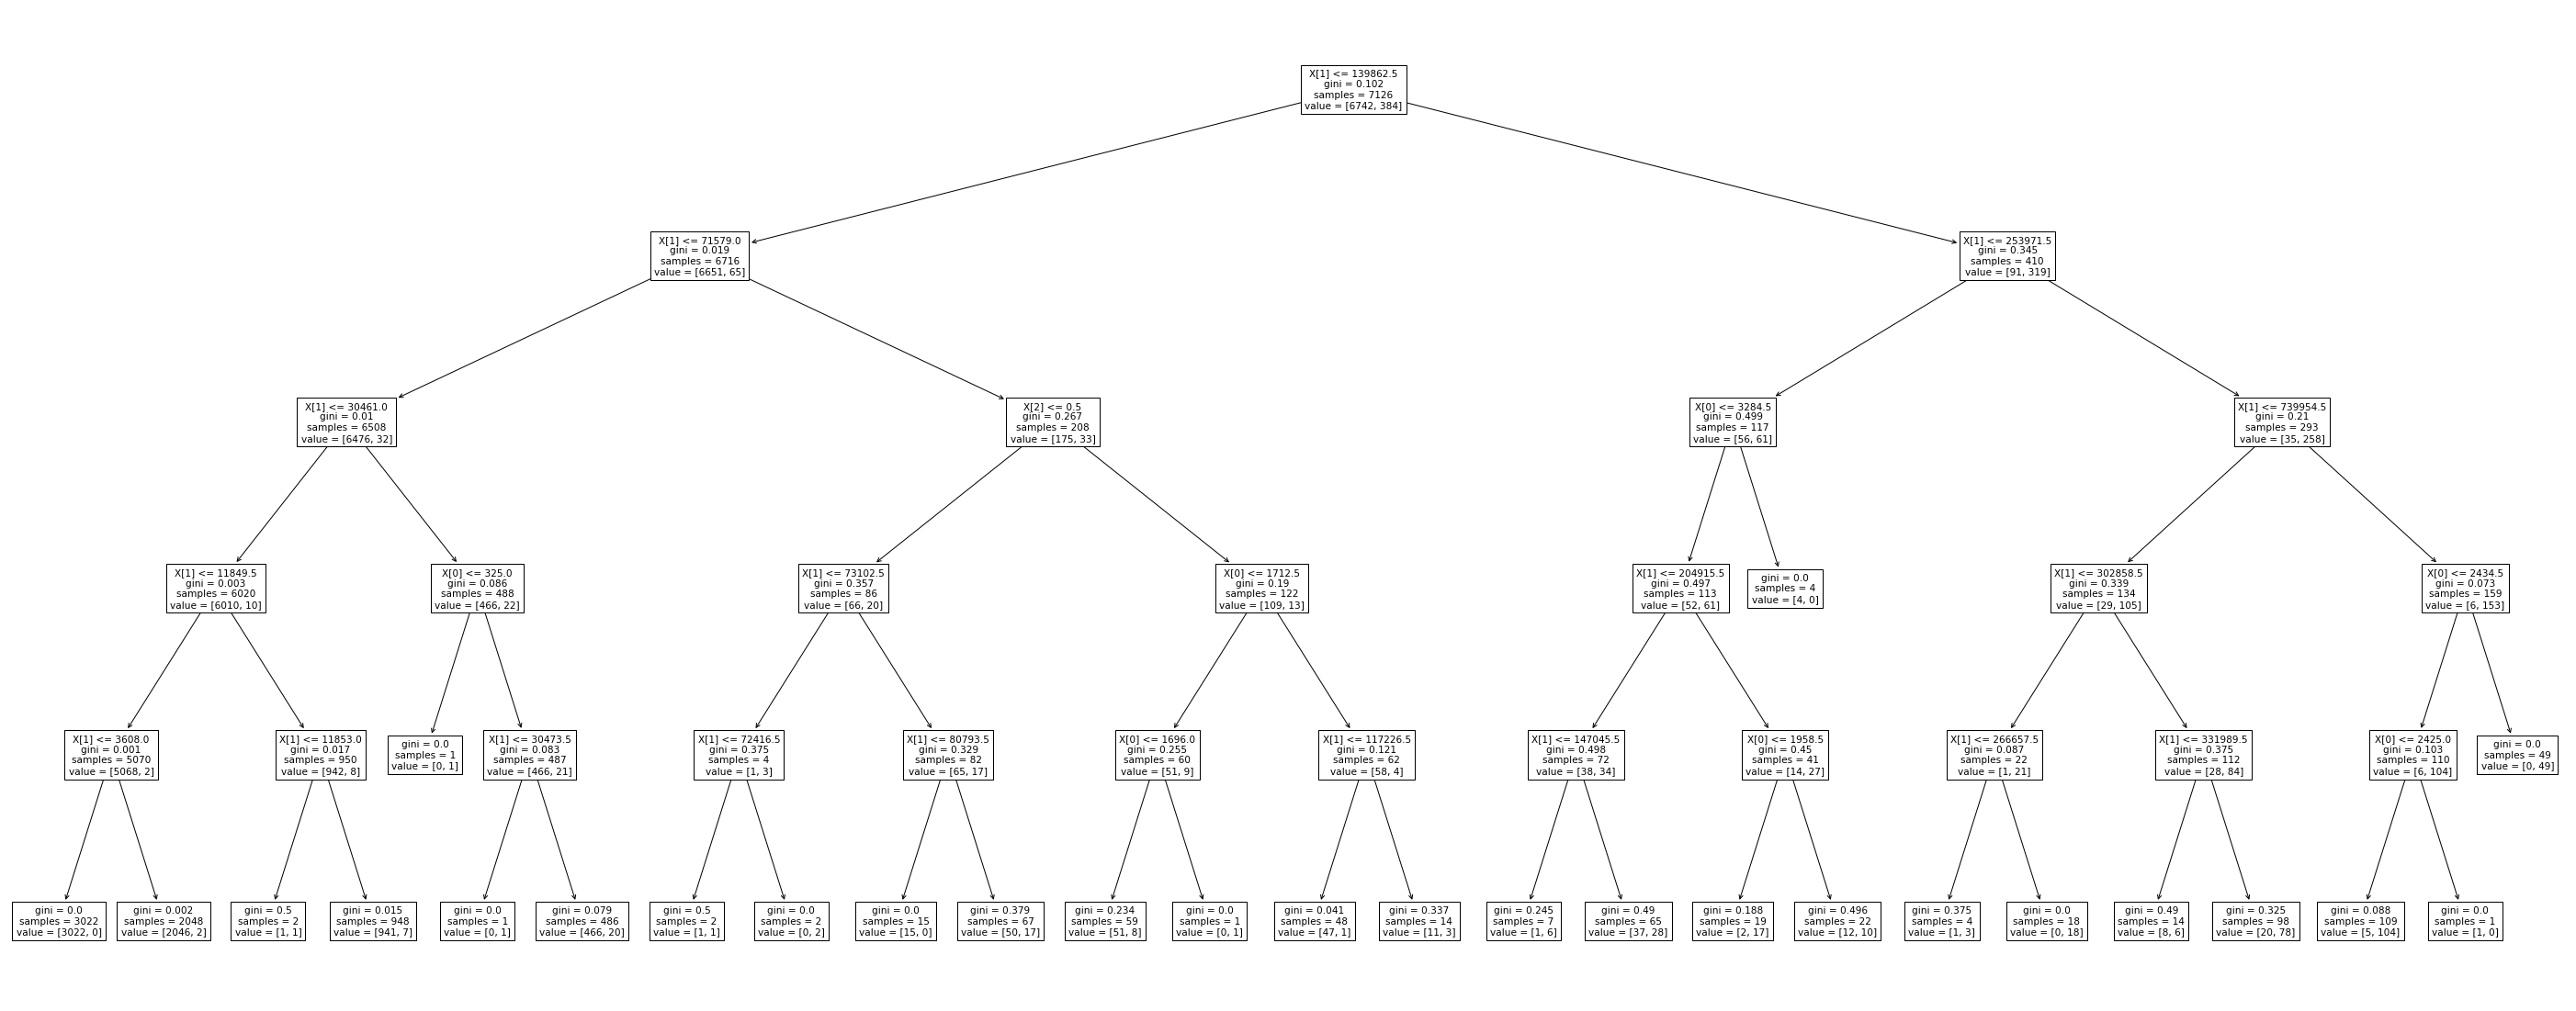

In [27]:
from matplotlib import pyplot
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART)

In [28]:
clasif_CART.score(atributos, objetivo)
#Clarificar que no usa el valor de mature para clasificar

0.981335952848723

In [29]:
clasif_CART_Relacional = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART_Relacional.fit(atributos_relacional, objetivo_relacional)

DecisionTreeClassifier(max_depth=5, random_state=54321)

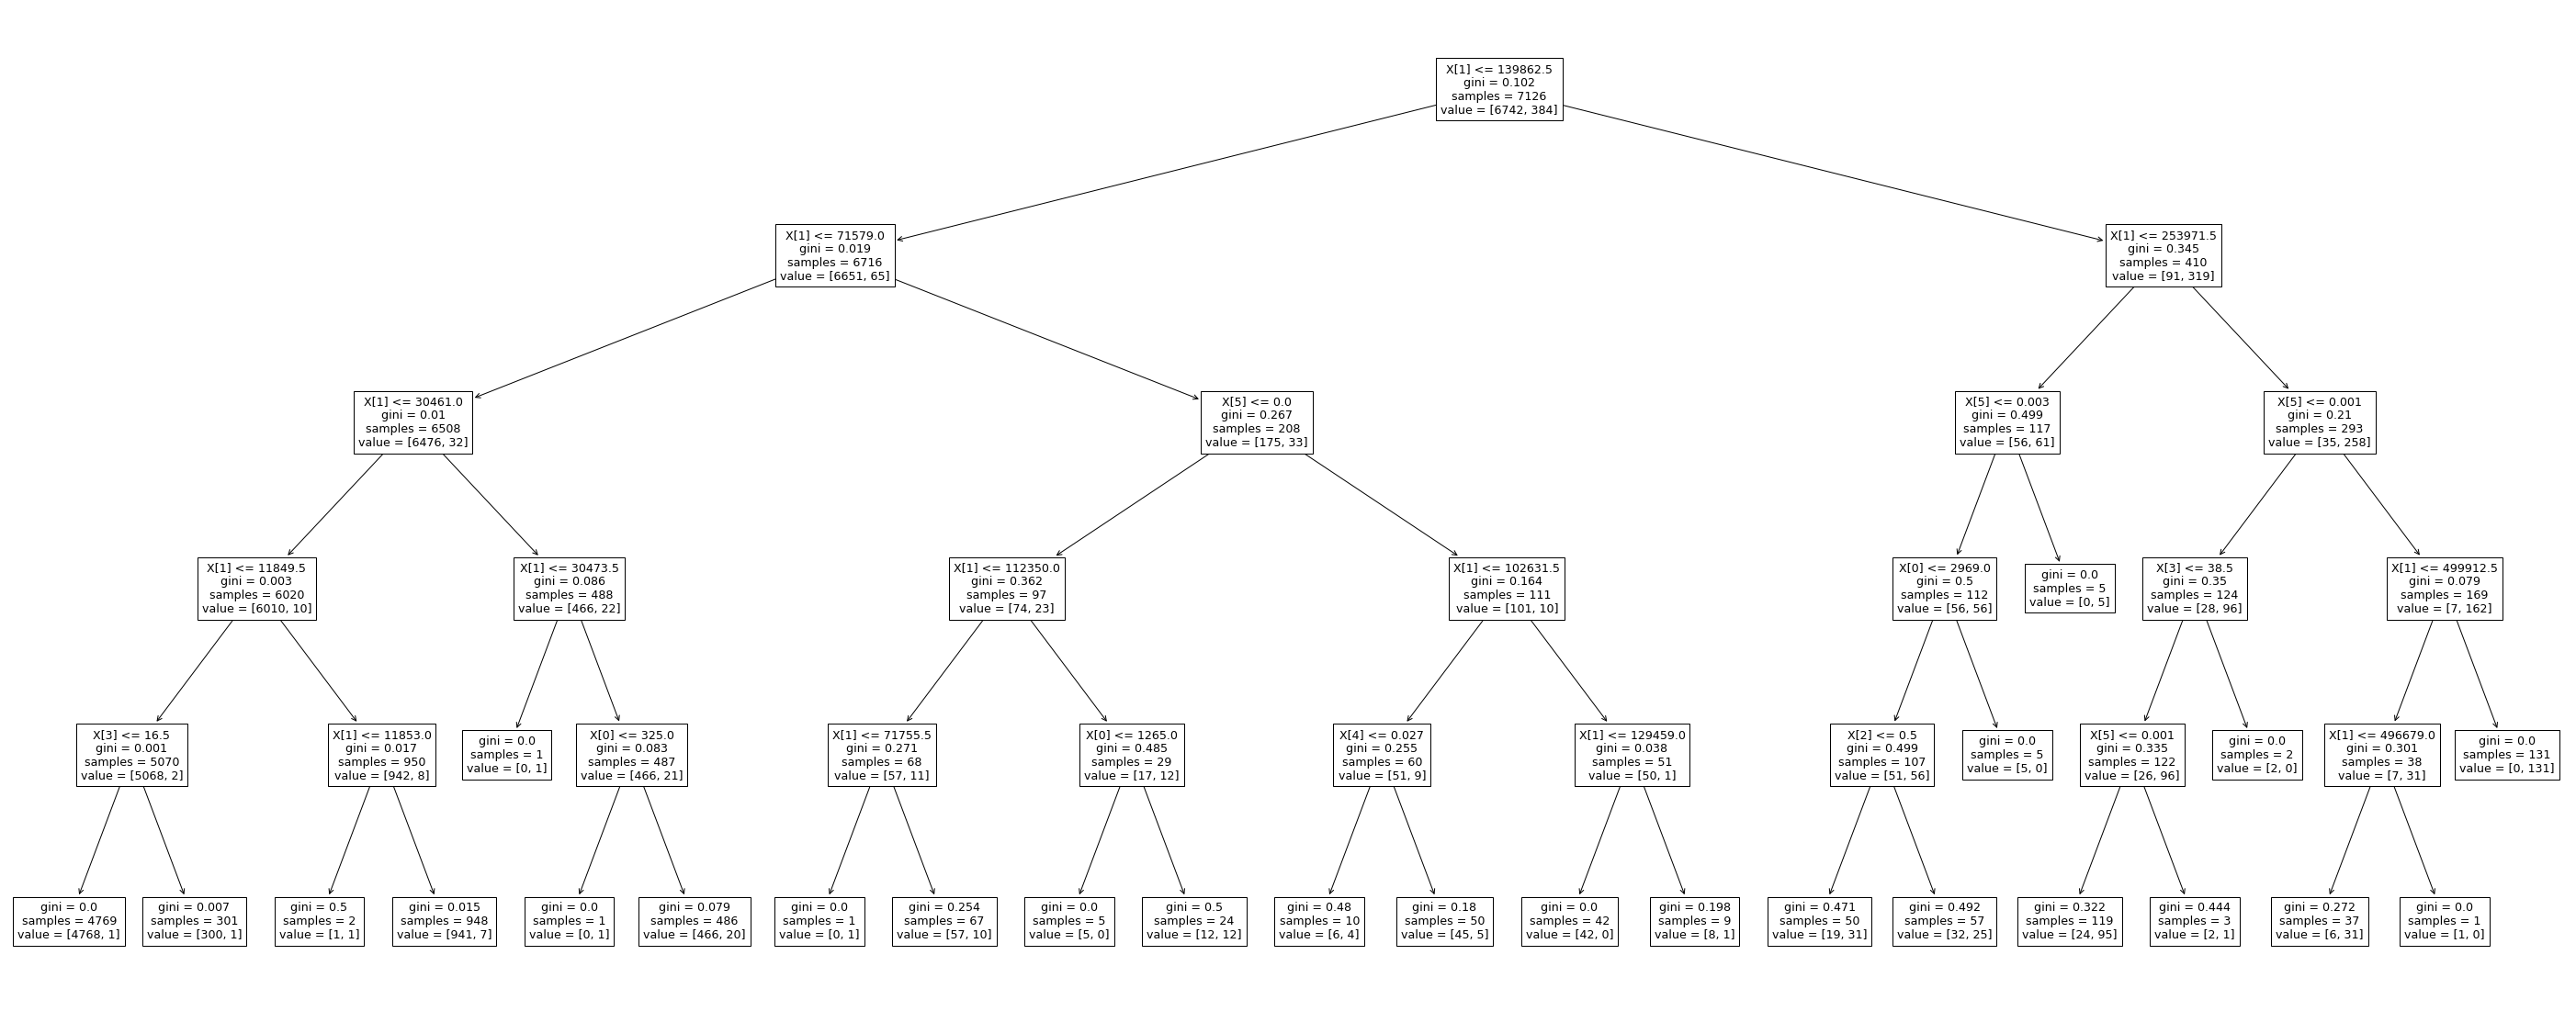

In [30]:
from matplotlib import pyplot
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART_Relacional)

In [31]:
clasif_CART_Relacional.score(atributos_relacional, objetivo_relacional)

0.9807746281223688

En este caso los atributos relacionales empeoran la tasa de acierto

### - MODELO DE CLASIFICACIÓN _Redes Neuronales_

In [32]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import get_logger
get_logger().setLevel('ERROR')

In [33]:
from tensorflow import random as tensorflow_random

tensorflow_random.set_seed(394867)

In [34]:
from sklearn import model_selection

numpy.random.seed(43958734)
numpy.set_printoptions(threshold=10)

In [35]:
from tensorflow import keras

In [36]:
atributos_numpy = atributos.to_numpy()*1
print(atributos)
print(atributos_numpy)

      days  views  mature
0     1459   9528       0
1     1629   3615       1
2      411  46546       1
3      953   5863       1
4      741   5594       1
...    ...    ...     ...
7121  2624   3174       0
7122  2035   3158       1
7123  1418   3839       1
7124  2046   6208       1
7125  1797   3545       0

[7126 rows x 3 columns]
[[ 1459  9528     0]
 [ 1629  3615     1]
 [  411 46546     1]
 ...
 [ 1418  3839     1]
 [ 2046  6208     1]
 [ 1797  3545     0]]


In [37]:
objetivo_numpy = objetivo.to_numpy().astype(float)
print(objetivo)
print(objetivo_numpy)

0       False
1       False
2       False
3       False
4       False
        ...  
7121    False
7122    False
7123    False
7124    False
7125    False
Name: partner, Length: 7126, dtype: bool
[0. 0. 0. ... 0. 0. 0.]


In [38]:
#normalizador.adapt(atributos_numpy)

In [39]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
    atributos_numpy, objetivo_numpy, test_size=.25)

In [40]:
red_twitch = keras.Sequential()

red_twitch.add(keras.Input(shape=(3,)))
#red_twitch.add(keras.layers.Dense(1))
red_twitch.add(keras.layers.Dense(10, activation='relu'))
red_twitch.add(keras.layers.Dense(1, activation='sigmoid'))
#red_twitch.add(keras.layers.Dense(60, input_dim=(174), activation='relu'))
#función de activación (por defecto, la identidad), Dense(2, activation='softmax')


In [41]:
red_twitch.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.09740394,  0.6011292 ,  0.23858315, ...,  0.00652915,
          0.04551357, -0.01830882],
        [-0.33054975,  0.19584447, -0.47313538, ..., -0.11493564,
          0.02630776,  0.24672341],
        [ 0.13766181, -0.41053373, -0.45957154, ...,  0.22631943,
          0.02087563, -0.446378  ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[-0.6506456 ],
        [-0.24780658],
        [ 0.1495508 ],
        [ 0.45294982],
        [-0.5255858 ],
        [-0.3936802 ],
        [ 0.45888072],
        [ 0.3395713 ],
        [-0.56903076],
        [ 0.6323715 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [42]:
#red_twitch.compile(optimizer='SGD', loss='mean_squared_error')
red_twitch.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
red_twitch.fit(atributos_entrenamiento, objetivo_entrenamiento,
                batch_size=256, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 33855964.0000 - accuracy: 0.8939
Epoch 2/10
21/21 [==============================] - 0s 994us/step - loss: 0.6341 - accuracy: 0.9474
Epoch 3/10
21/21 [==============================] - 0s 948us/step - loss: 0.5956 - accuracy: 0.9474
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.9474
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.9474
Epoch 6/10
21/21 [==============================] - 0s 997us/step - loss: 0.4790 - accuracy: 0.9474
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.9474
Epoch 8/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.9474
Epoch 9/10
21/21 [==============================] - 0s 947us/step - loss: 0.3907 - accuracy: 0.9474
Epoch 10/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.9474


In [44]:
print(objetivo_entrenamiento)

[0. 0. 0. ... 0. 0. 0.]


#### REDES NEURONALES Relacional

In [45]:
atributos_relacional_numpy = atributos_relacional.to_numpy()*1
print(atributos_relacional)
print(atributos_relacional_numpy)

      days  views  mature  degree  clustering  bcentrality
0     1459   9528       0       7    0.142857     0.000434
1     1629   3615       1      19    0.093567     0.000828
2      411  46546       1       9    0.055556     0.000044
3      953   5863       1       3    0.000000     0.000004
4      741   5594       1       2    0.000000     0.000030
...    ...    ...     ...     ...         ...          ...
7121  2624   3174       0       4    0.333333     0.000010
7122  2035   3158       1       5    0.100000     0.000046
7123  1418   3839       1       3    0.000000     0.000004
7124  2046   6208       1      20    0.110526     0.000247
7125  1797   3545       0       2    0.000000     0.000002

[7126 rows x 6 columns]
[[1.45900000e+03 9.52800000e+03 0.00000000e+00 7.00000000e+00
  1.42857143e-01 4.33857035e-04]
 [1.62900000e+03 3.61500000e+03 1.00000000e+00 1.90000000e+01
  9.35672515e-02 8.27804496e-04]
 [4.11000000e+02 4.65460000e+04 1.00000000e+00 9.00000000e+00
  5.55555556e-0

In [46]:
objetivo_relacional_numpy = objetivo_relacional.to_numpy().astype(float)
print(objetivo_relacional)
print(objetivo_relacional_numpy)

0       False
1       False
2       False
3       False
4       False
        ...  
7121    False
7122    False
7123    False
7124    False
7125    False
Name: partner, Length: 7126, dtype: bool
[0. 0. 0. ... 0. 0. 0.]


In [47]:
(atributos_relacional_entrenamiento, atributos_relacional_prueba,
 objetivo_relacional_entrenamiento, objetivo_relacional_prueba) = model_selection.train_test_split(
    atributos_relacional_numpy, objetivo_relacional_numpy, test_size=.25)

In [48]:
red_twitch = keras.Sequential()

red_twitch.add(keras.Input(shape=(6,)))
#red_twitch.add(keras.layers.Dense(1))
red_twitch.add(keras.layers.Dense(10, activation='relu'))
red_twitch.add(keras.layers.Dense(1, activation='sigmoid'))
#red_twitch.add(keras.layers.Dense(60, input_dim=(174), activation='relu'))
#función de activación (por defecto, la identidad), Dense(2, activation='softmax')


In [49]:
#red_twitch.compile(optimizer='SGD', loss='mean_squared_error')
red_twitch.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
red_twitch.fit(atributos_relacional_entrenamiento, objetivo_relacional_entrenamiento,
                batch_size=256, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 34395968.0000 - accuracy: 0.9077
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 158.5865 - accuracy: 0.9459
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.9459
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.9459
Epoch 5/10
21/21 [==============================] - 0s 999us/step - loss: 0.5555 - accuracy: 0.9459
Epoch 6/10
21/21 [==============================] - 0s 997us/step - loss: 0.5294 - accuracy: 0.9459
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.9459
Epoch 8/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.9459
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.9459
Epoch 10/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.9459
